# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import stats
from scipy.stats import shapiro

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017=pd.read_csv('../data/sat_2017.csv')
act2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
def clean_headers(pd):
    pd.columns=pd.columns.str.replace('-','_').str.replace(' ','_').str.lower()


In [6]:
clean_headers(sat2017)
clean_headers(act2017)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [7]:
for pds in sat2017,act2017:
    print(pds.describe())

       evidence_based_reading_and_writing        math        total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
         english       math    reading    science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.5250

Answer: 
The SAT and ACT have 5 and 7 columns respectively. The data of both dataframe are mostly in the type of data they should be, with the exception of composite which should be a float type and yet is not shown in the describe, tentatively due to an error somewhere in the list.

Both states column also seems to be neatly arranged in the alphabetical order based on the head with the exception of 'National' in the state column of the dataframe in ACT scores. We could tentatively use this as the index with set_index function if the columns proves to be unique. 

#### 4a. Does the data look complete? 

In [8]:
for pds in sat2017,act2017:
    print(pds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                                 51 non-null object
participation                         51 non-null object
evidence_based_reading_and_writing    51 non-null int64
math                                  51 non-null int64
total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state            52 non-null object
participation    52 non-null object
english          52 non-null float64
math             52 non-null float64
reading          52 non-null float64
science          52 non-null float64
composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


In [9]:
# finding the extra value
act2017[np.logical_not(act2017.state.isin(sat2017.state))]

,state,participation,english,math,reading,science,composite
0,National,60%,20.3,20.7,21.4,21.0,21.0


In [10]:
act2017[1:].mean()

english    20.931373
math       21.182353
reading    22.013725
science    21.041176
dtype: float64

Answer: The description of the columns each matches the papers that students sit in the tests except for the optional writing score for ACT(and that is fine since it is graded as a separate ELA score). However, there are 51 states in america and it seems like there are 52 entries. Closer inspections as done above shows that the extra ACT score is the national (ie. total result) that seems dubious as it does not seem to be the mean from all the 51 states.

None of the data seems to be empty or null and thus looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The actual scores for the individual sat test can range from 400 - 800 for each paper and the total from 800 - 1600. The max and min of our SAT data in order of math, english and total are 482,52,950 and 644,651,1295 respectively. The minimum for the math score looks questionable. For ACT, the score can range from 1 - 36 and doing the same for reveals a problem with the minimal score in with science which look suspiciously low even though it is within the range. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
sat2017[sat2017.math==sat2017.math.min()]

,state,participation,evidence_based_reading_and_writing,math,total
20,Maryland,69%,536,52,1060


In [12]:
act2017[act2017.science==act2017.science.min()]

,state,participation,english,math,reading,science,composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [13]:
# replace sat score
sat2017.loc[20,'math']=524
act2017.loc[21,'science']=23.2
print(sat2017.loc[20],act2017.loc[21])

state                                 Maryland
participation                              69%
evidence_based_reading_and_writing         536
math                                       524
total                                     1060
Name: 20, dtype: object state            Maryland
participation         28%
english              23.3
math                 23.1
reading              24.2
science              23.2
composite            23.6
Name: 21, dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
#code
for pds in sat2017,act2017:
    print(pds.dtypes)

state                                 object
participation                         object
evidence_based_reading_and_writing     int64
math                                   int64
total                                  int64
dtype: object
state             object
participation     object
english          float64
math             float64
reading          float64
science          float64
composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The composite column in ACT should be a float as seen in the head. The participation in both ACT and SAT should also be floats.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
def convert_percent(num):
    return float(num.replace('%','').strip())

- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
sat2017.participation=sat2017.participation.map(lambda num: convert_percent(num))
act2017.participation=act2017.participation.map(lambda num: convert_percent(num))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
act2017[pd.to_numeric(act2017.composite, errors='coerce').isnull()]

,state,participation,english,math,reading,science,composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


In [18]:
act2017.loc[51,'composite']=20.2

In [19]:
act2017.composite=act2017.composite.apply(pd.to_numeric)

- Display the data types again to confirm they are correct.

In [20]:
for pds in sat2017,act2017:
    print(pds.dtypes)

state                                  object
participation                         float64
evidence_based_reading_and_writing      int64
math                                    int64
total                                   int64
dtype: object
state             object
participation    float64
english          float64
math             float64
reading          float64
science          float64
composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#last 3 char will be sat/act
sat2017.rename({'participation': 'participation_2017sat',
                'evidence_based_reading_and_writing':'read_and_write_2017sat',
                'math':'math_2017sat',
                'total':'total_2017sat'
                }, axis= 1,inplace=True)
# state is unchanged
act2017.rename({act_names : (act_names+'_2017act')  for act_names in act2017.columns[1:]},axis=1,inplace=True)
act2017.head()


,state,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [22]:
sat2017.head()

,state,participation_2017sat,read_and_write_2017sat,math_2017sat,total_2017sat
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**


|Feature|Type|Dataset|Description|
|---|---|---|---|
|act2017|DataFrame|2017 ACT|DataFrame from ACT in 2017|
|act2018|DataFrame|2018 ACT|DataFrame from ACT in 2018|
|sat2017|DataFrame|2017 SAT|DataFrame from SAT in 2017|
|sat2018|DataFrame|2018 SAT|DataFrame from SAT in 2018|
|state|object|act2018|All 50 American states in 2018|
|participation_2017sat|float|sat2017|Participation rates for SAT tests in 2017| 
|read_and_write_2017act|float|sat2017|Average scores for the evidence-based reading and writing segment of the SAT in 2017| 
|math_2017sat|float|sat2017|Average scores for the math segment of the SAT in 2017| 
|total_2017sat|float|sat2017|Average total scores for the SAT in 2017|
|participation_2017act|float|act_2017|Participation rates for ACT in 2017| 
|english_2017act|float|act2017|Average english scores for the ACT in 2017| 
|math_2017act|float|act2017|Average math scores for the ACT in 2017| 
|reading_2017act|float|act2017|Average reading scores for the ACT in 2017|
|science_2017act|float|act2017|Average science scores for the ACT in 2017| 
|composite_2017act|float|act2017|Average composite scores for the ACT in 2017| 
|participation_2018sat|float|sat2018|Participation rates for SAT tests in 2018| 
|read_and_write_2018act|float|sat2018|Average scores for the evidence-based reading and writing segment of the SAT in 2018| 
|math_2018sat|float|sat2018|Average scores for the math segment of the SAT in 2018| 
|total_2018sat|float|sat2018|Average total scores for the SAT in 2018|
|participation_2018act|float|act2018|Participation rates for ACT in 2018| 
|english_2018act|float|act2018|Average english scores for the ACT in 2018| 
|math_2018act|float|act2018|Average math scores for the ACT in 2018| 
|reading_2018act|float|act2018|Average reading scores for the ACT in 2018|
|science_2018act|float|act2018|Average science scores for the ACT in 2018| 
|composite_2018act|float|act2018|Average composite scores for the ACT in 2018| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
# Comparing the series between act and sat and creating a boolean list which gives true for the index of the extra row
act2017[np.logical_not(act2017.state.isin(sat2017.state))]

,state,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [24]:
act2017.drop(0,inplace=True)
act2017.head()


,state,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
combined2017=pd.merge(sat2017,act2017)
combined2017.head()

,state,participation_2017sat,read_and_write_2017sat,math_2017sat,total_2017sat,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
combined2017.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
# import
sat2018 = pd.read_csv('../data/sat_2018.csv')
#rename header
sat2018.rename({'State':'state',
                'Participation': 'participation_2018sat',
                'Evidence-Based Reading and Writing':'read_and_write_2018sat',
                'Math':'math_2018sat',
                'Total':'total_2018sat'
                }, axis= 1,inplace=True)
# change participation into int
sat2018.participation_2018sat = sat2018.participation_2018sat.str.replace('%','').apply(pd.to_numeric)

In [28]:
# import and rename
act2018 = pd.read_csv('../data/act_2018_updated.csv')
clean_headers(act2018)
act2018.rename({act_names : (act_names+'_2018act').replace('average_','').replace('_score','')  for act_names in act2018.columns[1:]},axis=1,inplace=True)
act2018.rename({'percentage_of_students_tested_2018act' :'participation_2018act'},axis=1,inplace=True)

In [29]:
for pd in sat2018,act2018:
    print(pd.dtypes,pd.shape)

state                     object
participation_2018sat      int64
read_and_write_2018sat     int64
math_2018sat               int64
total_2018sat              int64
dtype: object (51, 5)
state                     object
participation_2018act      int64
composite_2018act        float64
english_2018act          float64
math_2018act             float64
reading_2018act          float64
science_2018act          float64
dtype: object (51, 7)


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [30]:
final = combined2017.merge(sat2018.merge(act2018))
final.to_csv('../data/final.csv')

In [31]:
final.participation_2018sat=final.participation_2018sat.map(lambda num: float(num))
final.participation_2018act=final.participation_2018act.map(lambda num: float(num))

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
final.set_index('state').transpose().describe()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,253.175000,237.655000,245.525000,257.700000,232.955000,245.760000,234.99500,222.945000,217.395000,235.380000,...,264.560000,266.205000,226.180000,245.275000,244.035000,243.095000,235.865000,227.435000,279.005000,269.070000
std,385.078278,360.395474,373.925531,392.929011,350.494792,366.900869,341.41367,325.444479,313.448568,346.329967,...,406.554509,406.572348,336.481338,373.556672,367.401005,364.728326,354.575759,343.852398,427.913005,411.481194
min,5.000000,18.700000,18.200000,3.000000,22.100000,11.000000,24.60000,17.000000,22.700000,19.000000,...,3.000000,5.000000,19.500000,3.000000,23.100000,23.300000,20.900000,14.000000,3.000000,3.000000
25%,18.900000,20.275000,19.475000,19.075000,22.650000,21.125000,25.42500,23.400000,23.675000,19.475000,...,21.575000,19.475000,20.700000,19.900000,23.750000,23.725000,22.000000,20.225000,20.375000,19.775000
50%,19.500000,27.300000,24.550000,19.600000,25.050000,24.150000,26.05000,24.300000,28.450000,38.550000,...,22.250000,19.900000,31.050000,20.700000,24.650000,24.650000,23.350000,21.250000,20.700000,20.600000
75%,571.250000,535.750000,555.500000,580.000000,525.750000,509.250000,513.75000,492.000000,471.000000,502.750000,...,605.250000,604.750000,508.250000,492.500000,551.750000,543.250000,535.000000,492.750000,641.250000,609.250000
max,1166.000000,1106.000000,1149.000000,1208.000000,1076.000000,1201.000000,1053.00000,998.000000,977.000000,1099.000000,...,1240.000000,1231.000000,1032.000000,1238.000000,1120.000000,1117.000000,1081.000000,1086.000000,1294.000000,1257.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [33]:
def standard_deviation(column):
    col_mean=sum(column)/len(column)
    return (((np.sum([(x - col_mean) ** 2 for x in column])/len(column)))**0.5)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
{i:standard_deviation(j) for i,j in final.drop('state',axis=1).items()}

{'participation_2017sat': 34.929070766645076,
 'read_and_write_2017sat': 45.21697020437866,
 'math_2017sat': 46.65713364485504,
 'total_2017sat': 91.58351056778743,
 'participation_2017act': 31.824175751231806,
 'english_2017act': 2.3304876369363368,
 'math_2017act': 1.9624620273436781,
 'reading_2017act': 2.046902931484265,
 'science_2017act': 1.7222161451443672,
 'composite_2017act': 2.0007860815819893,
 'participation_2018sat': 36.946619223539415,
 'read_and_write_2018sat': 47.03460978357609,
 'math_2018sat': 47.301945503783536,
 'total_2018sat': 93.22742384464432,
 'participation_2018act': 33.745194881997506,
 'composite_2018act': 2.0855261815801143,
 'english_2018act': 2.4222536143202795,
 'math_2018act': 2.0157072555557174,
 'reading_2018act': 2.1458918845104216,
 'science_2018act': 1.8516885484833538}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [35]:
final.std()

participation_2017sat     35.276632
read_and_write_2017sat    45.666901
math_2017sat              47.121395
total_2017sat             92.494812
participation_2017act     32.140842
english_2017act            2.353677
math_2017act               1.981989
reading_2017act            2.067271
science_2017act            1.739353
composite_2017act          2.020695
participation_2018sat     37.314256
read_and_write_2018sat    47.502627
math_2018sat              47.772623
total_2018sat             94.155083
participation_2018act     34.080976
composite_2018act          2.106278
english_2018act            2.446356
math_2018act               2.035765
reading_2018act            2.167245
science_2018act            1.870114
dtype: float64

Answer: No. I don't understand what the transpose is trying to do... makes no sense trying to group them on index (what is the point of the standard deviation of values on different scales). The standard deviation was close but still doesn\`t match with the np.std() function due to the intricacies in float handling.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [36]:
def top_btm(a):
    sorting=final.sort_values(a,ascending=False)
    print(sorting[['state',a]].head())
    print(sorting[['state',a]].tail())
    
top_btm('participation_2017sat')
top_btm('participation_2018sat')
top_btm('participation_2017act')
top_btm('participation_2018act')
top_btm('total_2017sat')
top_btm('total_2018sat')
top_btm('composite_2017act')
top_btm('composite_2018act')


                   state  participation_2017sat
8   District of Columbia                  100.0
22              Michigan                  100.0
6            Connecticut                  100.0
7               Delaware                  100.0
29         New Hampshire                   96.0
           state  participation_2017sat
3       Arkansas                    3.0
50       Wyoming                    3.0
34  North Dakota                    2.0
24   Mississippi                    2.0
15          Iowa                    2.0
          state  participation_2018sat
5      Colorado                  100.0
6   Connecticut                  100.0
7      Delaware                  100.0
22     Michigan                  100.0
12        Idaho                  100.0
           state  participation_2018sat
24   Mississippi                    3.0
15          Iowa                    3.0
49     Wisconsin                    3.0
50       Wyoming                    3.0
34  North Dakota                    2.

- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?


In [37]:
final[final['participation_2017sat']==100][['state','participation_2017act','participation_2018act'
                                           ,'participation_2017sat','participation_2018sat']]
# Participation of District of Columbia has dropped by 8%

,state,participation_2017act,participation_2018act,participation_2017sat,participation_2018sat
6,Connecticut,31.0,26.0,100.0,100.0
7,Delaware,18.0,17.0,100.0,100.0
8,District of Columbia,32.0,32.0,100.0,92.0
22,Michigan,29.0,22.0,100.0,100.0


In [38]:
final[final['participation_2017act']==100][['state','participation_2017act','participation_2018act'
                                           ,'participation_2017sat','participation_2018sat']]
#participation for Colorado dropped

,state,participation_2017act,participation_2018act,participation_2017sat,participation_2018sat
0,Alabama,100.0,100.0,5.0,6.0
3,Arkansas,100.0,100.0,3.0,5.0
5,Colorado,100.0,30.0,11.0,100.0
17,Kentucky,100.0,100.0,4.0,4.0
18,Louisiana,100.0,100.0,4.0,4.0
23,Minnesota,100.0,99.0,3.0,4.0
24,Mississippi,100.0,100.0,2.0,3.0
25,Missouri,100.0,100.0,3.0,4.0
26,Montana,100.0,100.0,10.0,10.0
28,Nevada,100.0,100.0,26.0,23.0


In [39]:
final[(final.participation_2017sat>50) & 
      (final.participation_2017act>50)][['state','participation_2017act','participation_2018act',
                                         'participation_2017sat','participation_2018sat']]

,state,participation_2017act,participation_2018act,participation_2017sat,participation_2018sat
9,Florida,73.0,66.0,83.0,56.0
10,Georgia,55.0,53.0,61.0,70.0
11,Hawaii,90.0,89.0,55.0,56.0


In [40]:
final[(final.participation_2018sat>50) & 
      (final.participation_2018act>50)][['state','participation_2017act','participation_2018act',
                                         'participation_2017sat','participation_2018sat']]

,state,participation_2017act,participation_2018act,participation_2017sat,participation_2018sat
9,Florida,73.0,66.0,83.0,56.0
10,Georgia,55.0,53.0,61.0,70.0
11,Hawaii,90.0,89.0,55.0,56.0
33,North Carolina,100.0,100.0,49.0,52.0
40,South Carolina,100.0,100.0,50.0,55.0


In [41]:
final[(final.participation_2017sat<50) & 
      (final.participation_2017act<50)][['state','participation_2017act','participation_2018act',
                                         'participation_2017sat','participation_2018sat']]

,state,participation_2017act,participation_2018act,participation_2017sat,participation_2018sat
37,Oregon,40.0,42.0,43.0,48.0


I think Oregon is very interesting since the sum of the participation for both act and sat in both year is does not exceed 100% (ie. some students do not take either test). Colorado also seemed to make a big shift from act to sat in 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

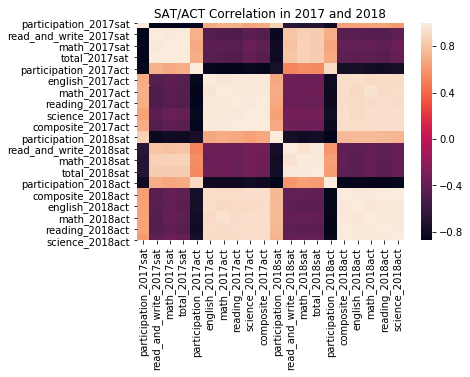

In [42]:
plt.title('SAT/ACT Correlation in 2017 and 2018')
sns.heatmap(final.corr());

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [43]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,36)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

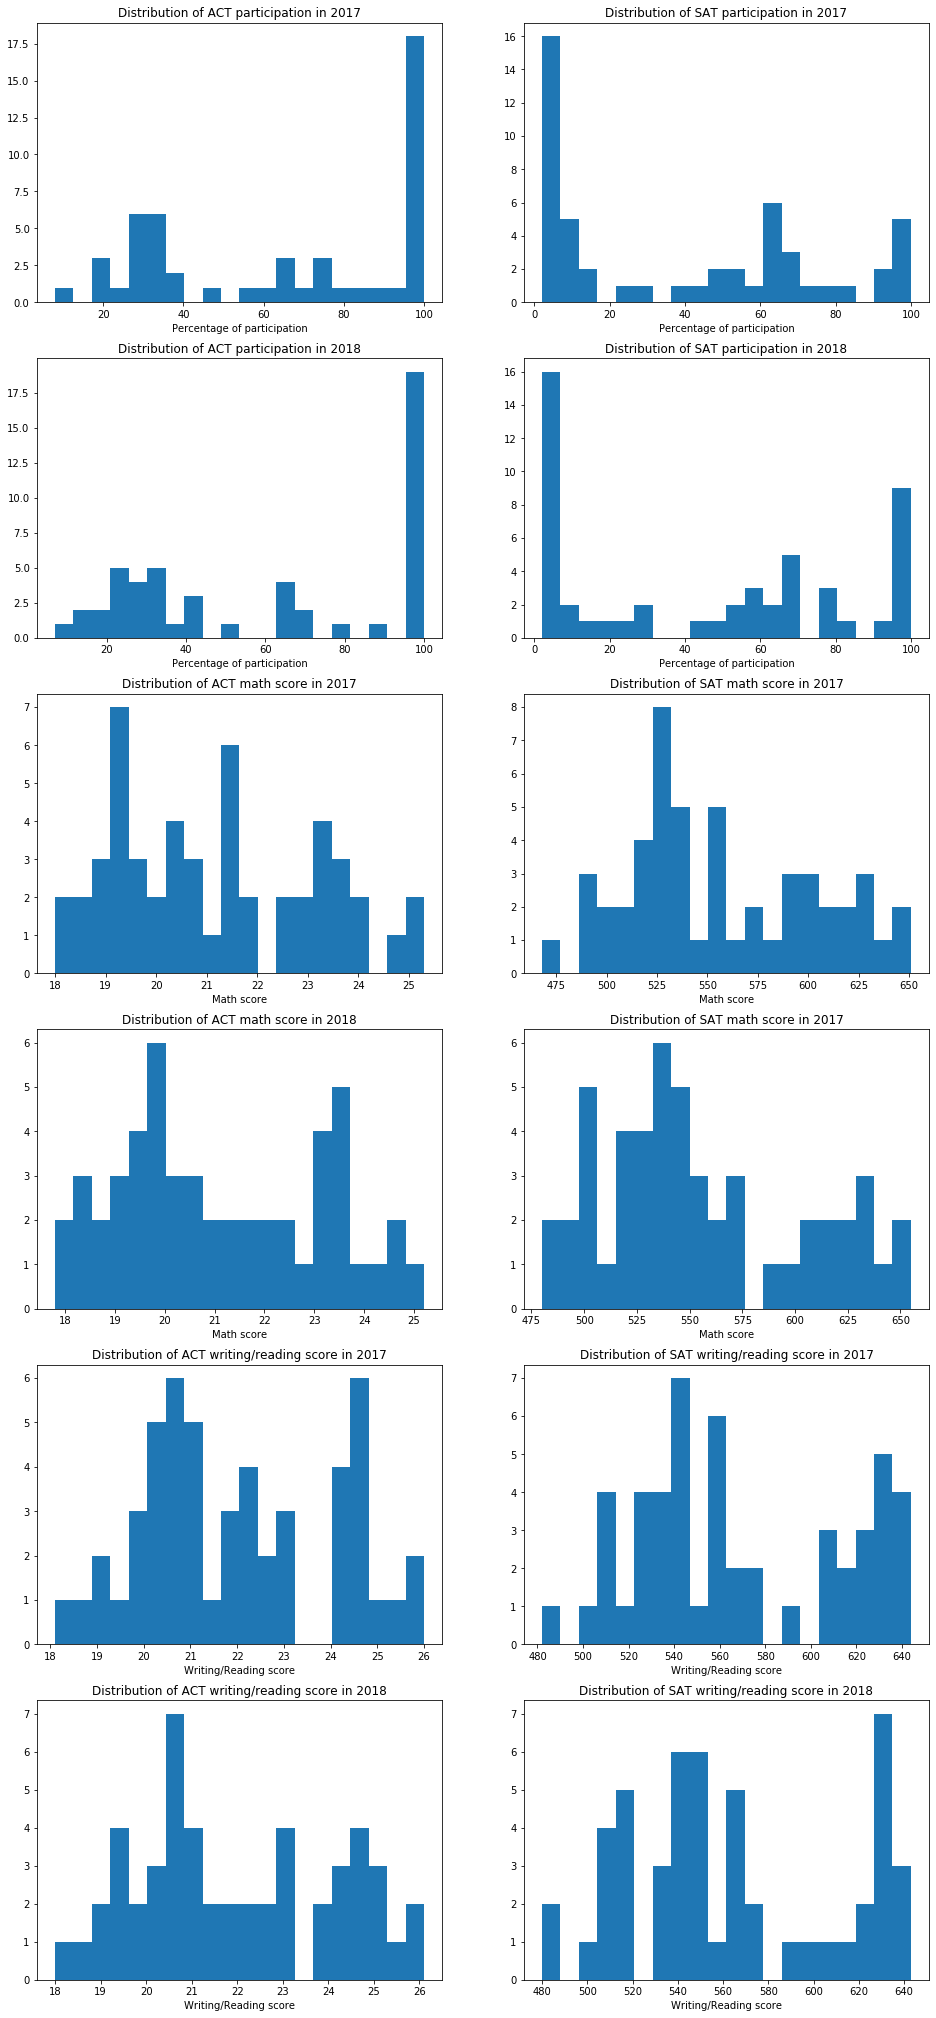

In [44]:
list_of_titles=['Distribution of ACT participation in 2017','Distribution of SAT participation in 2017',
                'Distribution of ACT participation in 2018','Distribution of SAT participation in 2018', 
                          'Distribution of ACT math score in 2017','Distribution of SAT math score in 2017',
                'Distribution of ACT math score in 2018','Distribution of SAT math score in 2017',
                         'Distribution of ACT writing/reading score in 2017','Distribution of SAT writing/reading score in 2017',
                'Distribution of ACT writing/reading score in 2018','Distribution of SAT writing/reading score in 2018']
list_of_xlabels=['Percentage of participation','Percentage of participation','Percentage of participation','Percentage of participation', 
                          'Math score','Math score','Math score','Math score',
                         'Writing/Reading score','Writing/Reading score','Writing/Reading score','Writing/Reading score']
subplot_histograms(final,['participation_2017act','participation_2017sat','participation_2018act','participation_2018sat', 
                          'math_2017act','math_2017sat','math_2018act','math_2018sat',
                         'reading_2017act','read_and_write_2017sat','reading_2018act','read_and_write_2018sat'],list_of_titles,list_of_xlabels)

Participation rate of both test does not seem to change much overall in the one year. There is also seems to be little change the math or reading/writing score. Somehow it seems that the scores obtained from the schools shows 2 peaks but neither poisson, binomial nor normal.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [45]:
# adapted from code above
def subplot_scatter(dataframe, list1_of_columns, list2_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list1_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,36))
    ax = ax.ravel() 
    for i, column in enumerate(list1_of_columns):
        ax[i].scatter(dataframe[list1_of_columns[i]],dataframe[list2_of_columns[i]]) 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list1_of_columns[i])
        ax[i].set_ylabel(list2_of_columns[i])

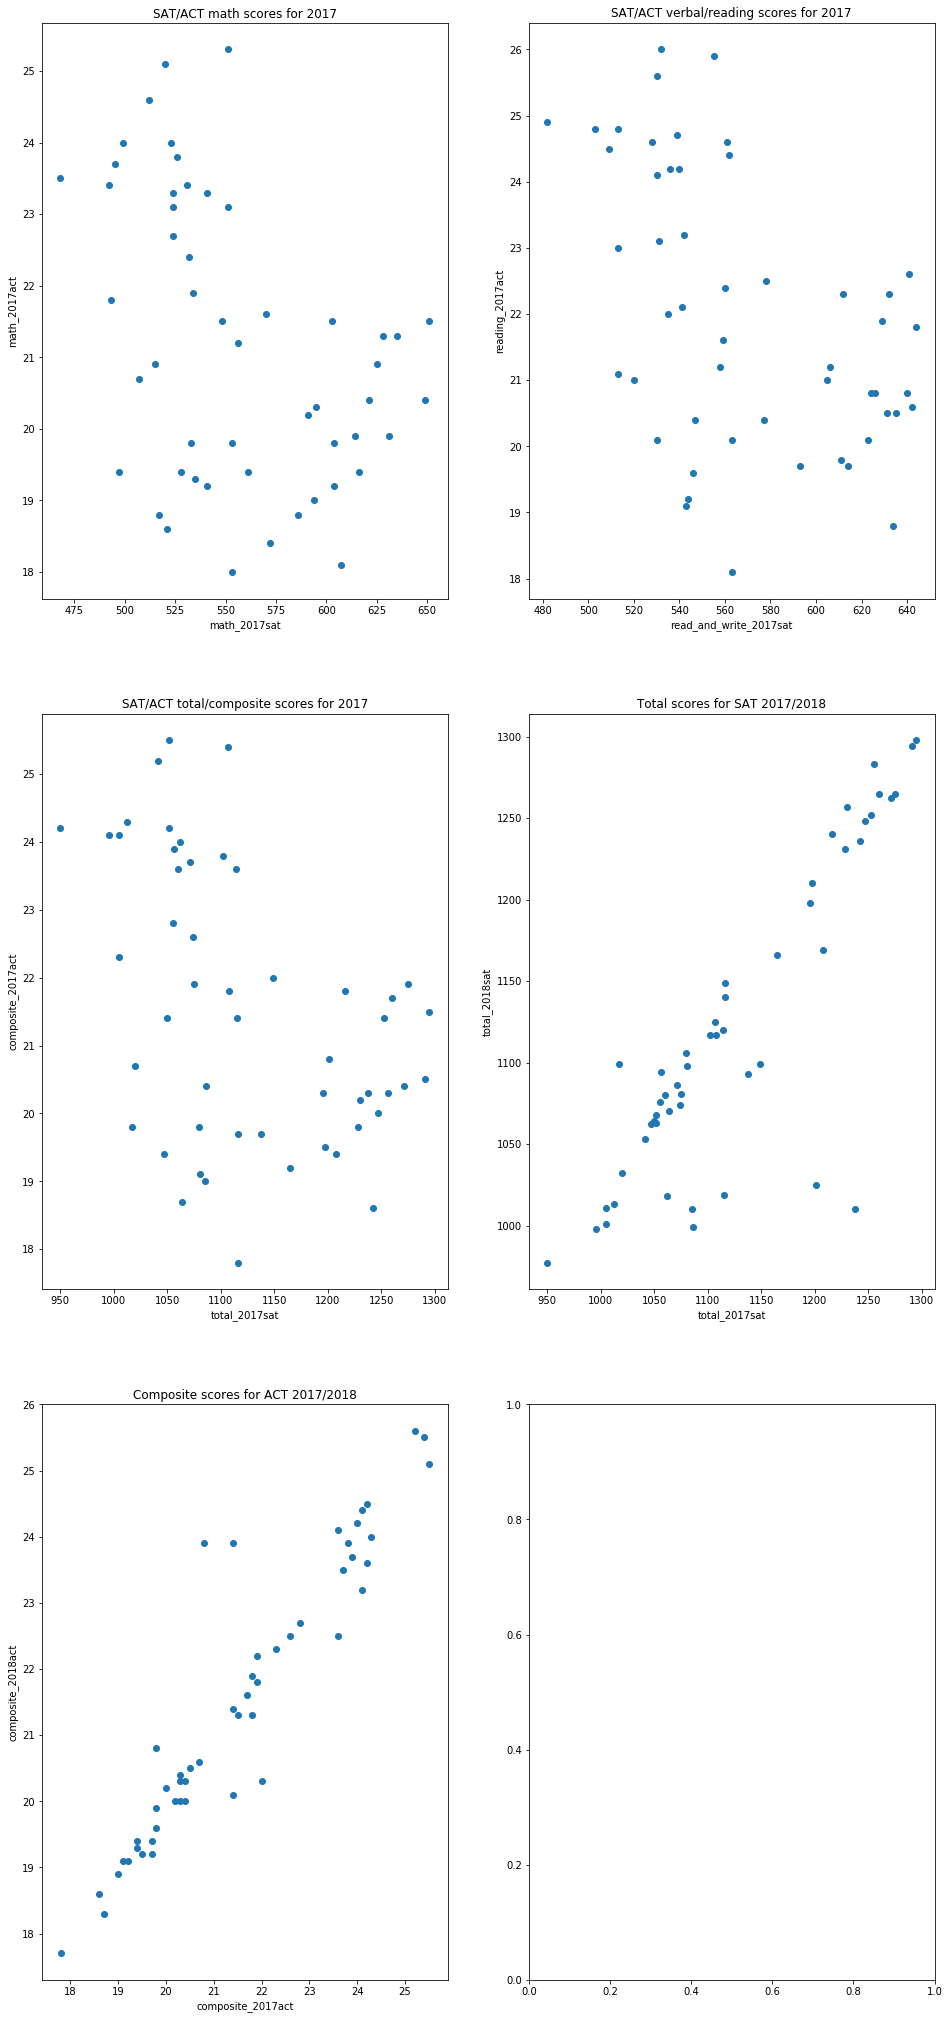

In [46]:
list1_of_columns=['math_2017sat','read_and_write_2017sat','total_2017sat','total_2017sat','composite_2017act']
list2_of_columns=['math_2017act','reading_2017act','composite_2017act','total_2018sat','composite_2018act']
list_of_titles2=['SAT/ACT math scores for 2017',
                'SAT/ACT verbal/reading scores for 2017',
                'SAT/ACT total/composite scores for 2017',
                'Total scores for SAT 2017/2018',
                'Composite scores for ACT 2017/2018',]
subplot_scatter(final,list1_of_columns,list2_of_columns,list_of_titles2)

It seems that the composite and total scores of ACT and SAT are linearly related with their previous year which make sense since we do not expect schools to score that differently across a year. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

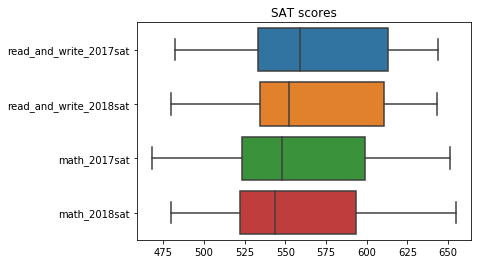

In [47]:
# the stuff inside data is just trying to filter the score
sns.boxplot(data=final[['read_and_write_2017sat','read_and_write_2018sat','math_2017sat','math_2018sat']],orient='h').set_title('SAT scores');


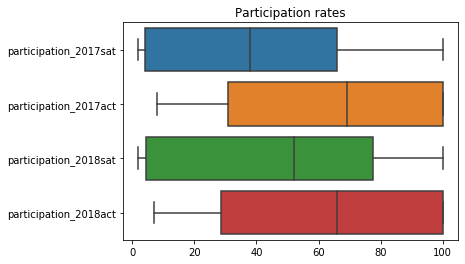

In [48]:
participate=list(final.columns[final.columns.str.contains('participation')])
sns.boxplot(data=final[participate], orient='h').set_title('Participation rates');

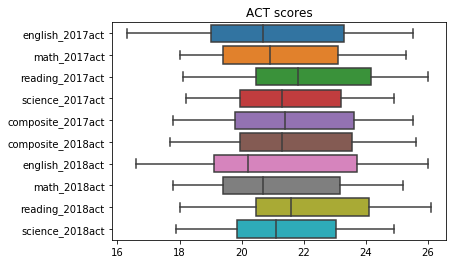

In [49]:
act=list(final.columns[final.columns.str.contains('act')])
sns.boxplot(data=final[act].drop(['participation_2017act','participation_2018act'],axis=1),orient='h').set_title('ACT scores');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [50]:
final=final.set_index('state')

In [51]:
print(skew(final))
final.describe()

[ 0.33617544  0.2646066   0.35421486  0.30168335 -0.19211796  0.34220217
  0.32281744  0.26137792  0.21233391  0.31032556  0.13218843  0.27392797
  0.51467778  0.45259949 -0.02126566  0.27360044  0.36048942  0.26155413
  0.19538991  0.16727084]


,participation_2017sat,read_and_write_2017sat,math_2017sat,total_2017sat,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2018sat,read_and_write_2018sat,math_2018sat,total_2018sat,participation_2018act,composite_2018act,english_2018act,math_2018act,reading_2018act,science_2018act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


The data approximately quite very symmetrical with skew values mostly between -0.5 and 0.5 where positive skew is to the right (tail is on the right) vice versa and seems mostly to be bimodal based on the graphs observed above.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

![](../assets/Distributions.png)

Answer: This distribution do not look normal when we define the population to be of the 51 states with their mean score. They mostly seem bimodal. Based on the shapiro-wilk test (done below), only act reading scores in 2017 seems to have a p-value higher than 0.05 which suggest normality.

In [52]:
# shaprio
def shapiro_col(col_list):
    k={i:shapiro(final[i]) for i in col_list}
    return k

shapiro_col(['participation_2017act','participation_2017sat','participation_2018act','participation_2018sat', 
                          'math_2017act','math_2017sat','math_2018act','math_2018sat',
                         'reading_2017act','read_and_write_2017sat','reading_2018act','read_and_write_2018sat'])

{'participation_2017act': (0.8398398160934448, 6.978356395848095e-06),
 'participation_2017sat': (0.8536623120307922, 1.649127807468176e-05),
 'participation_2018act': (0.8256993889808655, 3.0170992886269232e-06),
 'participation_2018sat': (0.856289803981781, 1.9515182430041023e-05),
 'math_2017act': (0.9527901411056519, 0.041251927614212036),
 'math_2017sat': (0.9493667483329773, 0.029660360887646675),
 'math_2018act': (0.9506922364234924, 0.03368690237402916),
 'math_2018sat': (0.9374468922615051, 0.009714636951684952),
 'reading_2017act': (0.9556081295013428, 0.05425470694899559),
 'read_and_write_2017sat': (0.9205631613731384, 0.002204112010076642),
 'reading_2018act': (0.9529093503952026, 0.04173128679394722),
 'read_and_write_2018sat': (0.927172839641571, 0.003885231912136078)}

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It might not be suitable since the data we were given are already aggregated the data. For instance, a high participation rate from a state of smaller population would not actually increase the participation by much yet it can change the average participation rates more than it should. For instance, a 2 from a state population of 2 participate in act which gives a participation rate of 100% and we have 0 from a state population of 100 participate in act. The average of the participation rate would be 50% yet only 2 individuals are taking the act.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It makes little sense to do so since the rubicks for scoring might be different for the math papers. Also the formats of the test might require different skills other than maths. For instance, ACT gives lesser time for their questions which put emphasis on applying practised problems which might emphasis memory-skills more than math. Thus, it is hard to compare ACT to SAT scores directly.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [53]:
t_stat_act,p_val_act=stats.ttest_ind(final['math_2017act'],final['math_2018act'],equal_var=False)
print(t_stat_act,p_val_act)

0.1429241656548978 0.8866378692365904


In [54]:
t_stat_sat,p_val_sat=stats.ttest_ind(final['reading_2017act'],final['reading_2018act'],equal_var=False)
print(t_stat_sat,p_val_sat)

-0.004675253997432277 0.9962790354054806


Thee p-value > 0.05 for the math score in act which suggests unlikelihood of a drop in the mean math score.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The first state that has an obvious trend would be Colorado where the participation for SAT rose while ACT dipped. This is mostly due to the fact Colorado Education Department made it mandatory for the students to participate while offering it for free. 

Another state that could be of interest would be Oregon whom has shown an increase in SAT and ACT participation in the 2 years although the test remains mostly optional for the students there. Their high schooler mostly takes the Smarter Balanced test. However, the debate over whether to switch over to ACT/SAT might not be over as there has been said trends of students opting out of the national test. The Oregon Department of Education also mentions that they might be offering the college board test to sophomores in advanced courses.

The last state that shows an interesting trend would be florida where participation in both exams dropped. Yet there seemed to be few influential reason why that could be the case except for a class action against the college board for the reuse of examination questions in mid 2018. Another potential reason could be that report on the discussion on replacing Florida Standards Assessments(FDA) to SAT/ACT in early 2018 might deter students from participating on either paper.

In [55]:
final[(final.composite_2017act<final.composite_2017act.mean()) & (final.composite_2018act<final.composite_2018act.mean())
     &(final.total_2017sat<final.total_2017sat.mean()) & (final.total_2018sat<final.total_2018sat.mean())]

,participation_2017sat,read_and_write_2017sat,math_2017sat,total_2017sat,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2018sat,read_and_write_2018sat,math_2018sat,total_2018sat,participation_2018act,composite_2018act,english_2018act,math_2018act,reading_2018act,science_2018act
state,,,,,,,,,,,,,,,,,,,,
Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,19.5
Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0
North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,52.0,554,543,1098,100.0,19.1,18.0,19.3,19.5,19.2
Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,19.4,8.0,541,521,1062,100.0,19.3,18.4,18.8,20.1,19.4
South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
Texas,62.0,513,507,1020,45.0,19.5,20.7,21.1,20.9,20.7,66.0,520,512,1032,41.0,20.6,19.6,20.6,21.1,20.8
West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.4,28.0,513,486,999,65.0,20.3,19.8,19.4,21.3,20.4


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

I would recommend working on Oregon based on the data where there is a huge opportunity to increase participation rate in a state since participation rate are currently low (<50%). Based on outside findings, there are also mentions of the student populations getting tired of the longer durations of the national Smarter Balanced Test they have been taking since 2015. Moreover, it is the 25th most populous state in which meant efforts in increasing the participation rate would likely meant a good number of students taking up the test while not facing severe competition from ACT which only shows a student participation rate of 42% in 2018.

It is hard to propose any sort of measures with the given data, other than convincing the state department to switch over (which is like duh). I would like to have the data on the quotations for the test papers in ACT/SAT for the past few years, the rubicks for guaging the student\`s proficiency from the education department as well as college admission criteria data which will probably be useful to put forth reccomendations.